## Problem Statement

### Business Context

When you think of sneakers for a trip, the importance of good footwear cannot be discarded, and the obvious brands that come to mind are Adidas and Nike. Adidas vs Nike is a constant debate as the two giants in the apparel market, with a large market cap and market share, battle it out to come on top. As a newly hired Data Scientist in a market research company, you have been given the task of extracting insights from the data of men's and women's shoes, and grouping products together to identify similarities and differences between the product range of these renowned brands.

### Objective

To perform an exploratory data analysis and cluster the products based on various factors

### Key Questions

- Which variables are most important for clustering?
- How each cluster is different from the others?
- What are the business recommendations?

### Data Description

The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

- Product Name: Name of the product
- Product ID: ID of the product
- Listing Price: Listed price of the product
- Sale Price: Sale price of the product
- Discount: Percentage of discount on the product
- Brand: Brand of the product
- Rating: Rating of the product
- Reviews: Number of reviews for the product

## Importing necessary libraries

In [51]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [52]:
# loading the dataset
product_data = pd.read_csv("data_add_nik.csv")

In [53]:
# copying the data to another variable to avoid any changes to original data
df = product_data.copy()

## Data Overview

### Checking the shape of the data

In [54]:
df.shape

(3268, 8)

* The dataset has 3268 rows and 8 columns

### Displaying the first few rows of the data

In [55]:
# viewing the first few rows
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [56]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

### Checking the data types of the columns for the dataset.

In [57]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_Name   3268 non-null   object 
 1   Product_ID     3268 non-null   object 
 2   Listing_Price  3268 non-null   int64  
 3   Sale_Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


We won't need Product_ID for analysis, so let's drop this column.

In [58]:
df.drop("Product_ID", axis=1, inplace=True)

### Checking for duplicate values

In [59]:
# let's check for duplicate observations
df.duplicated().sum()

117

- There are 117 duplicate observations. We will remove them from the data.

In [60]:
df = df[(~df.duplicated())].copy()

### Checking the Statistical Summary

Let's take a look at the summary of the data

In [61]:
df.describe()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000
mean,7045.960330,5983.166931,27.860997,3.285687,41.891146
std,4652.089511,4173.708897,22.442753,1.371611,31.283464
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4599.000000,2999.000000,0.000000,2.600000,12.000000
50%,5999.000000,4599.000000,40.000000,3.600000,40.000000
75%,8999.000000,7799.000000,50.000000,4.400000,69.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


**Observations**

- 0 in the listing price indicates missing values.
- The average listing price is 7046.
- The average sale price is 5983.
- The average discount is 28%.
- The average rating is 3.3.
- The average number of reviews is 42.

In [62]:
# let's check how many products have listing price 0
(df.Listing_Price == 0).sum()

336

In [63]:
# let's check the products which have listing price 0
df[(df.Listing_Price == 0)]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,0,9995,0,Nike,0.0,0
2628,Nike Air Max Dia SE,0,9995,0,Nike,0.0,0
2629,Nike Air Max Verona,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...
3254,Nike Mercurial Vapor 13 Club MG,0,4995,0,Nike,0.0,0
3257,Air Jordan 5 Retro,0,15995,0,Nike,3.3,3
3260,Nike Tiempo Legend 8 Academy TF,0,6495,0,Nike,0.0,0
3262,Nike React Metcon AMP,0,13995,0,Nike,3.0,1


In [64]:
df[(df.Listing_Price == 0)].describe()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,336.0,336.000000,336.0,336.000000,336.000000
mean,0.0,11203.050595,0.0,2.797619,8.261905
std,0.0,4623.825788,0.0,2.150445,19.708393
min,0.0,1595.000000,0.0,0.000000,0.000000
25%,0.0,7995.000000,0.0,0.000000,0.000000
50%,0.0,10995.000000,0.0,3.950000,1.000000
75%,0.0,13995.000000,0.0,4.700000,6.000000
max,0.0,36500.000000,0.0,5.000000,223.000000


- There are 336 observations that have missing values in the listing price column
- We see that the discount for the products with listing price 0 is 0.
- So, we will replace the listing price with the corresponding sale price for those observations.

In [65]:
df.loc[(df.Listing_Price == 0), ["Listing_Price"]] = df.loc[
    (df.Listing_Price == 0), ["Sale_Price"]
].values

In [66]:
df.Listing_Price.describe()

count 3151.000000
mean 8240.573151
std 4363.018245
min 899.000000
25% 4999.000000
50% 7599.000000
75% 10995.000000
max 36500.000000
Name: Listing_Price, dtype: float64

### Checking for missing values

In [67]:
# checking missing values
df.isna().sum()

Product_Name 0
Listing_Price 0
Sale_Price 0
Discount 0
Brand 0
Rating 0
Reviews 0
dtype: int64

- There are no missing values in the data.

## Exploratory Data Analysis

The below functions need to be defined to carry out the EDA.

In [68]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate Analysis

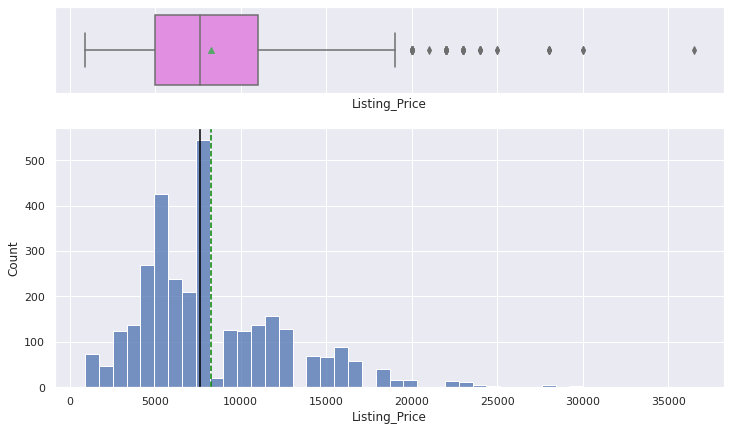

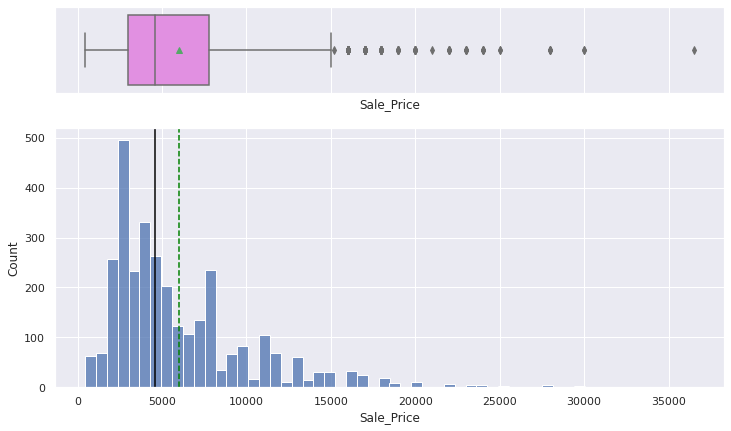

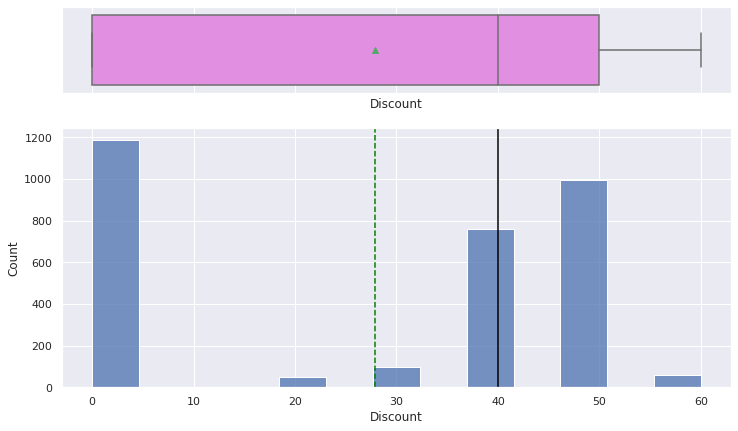

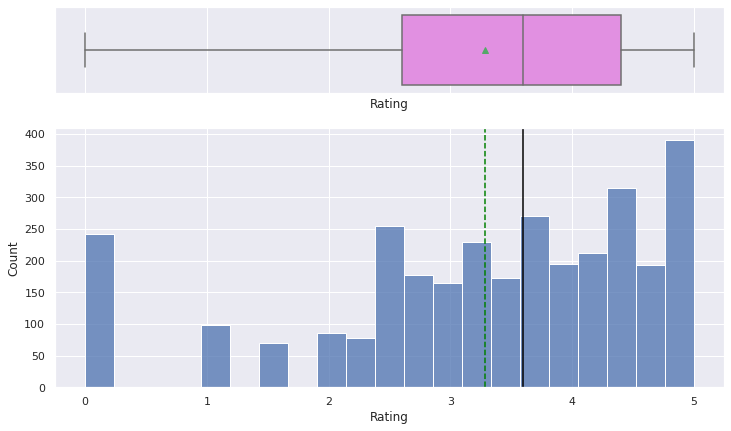

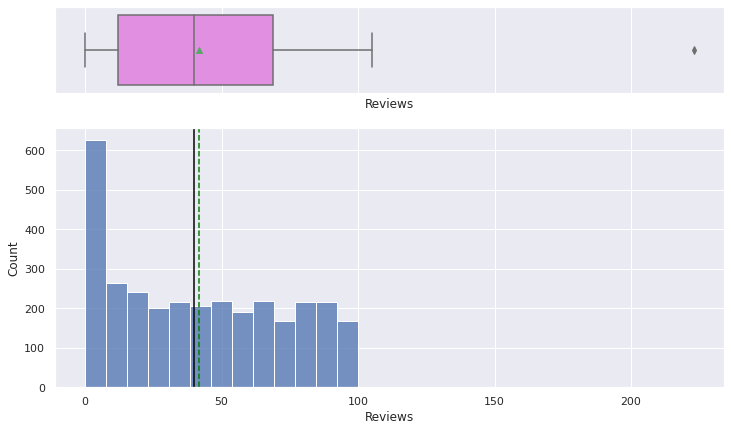

In [69]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

**Observations**

- Listing price and sale price have right-skewed distributions with upper outliers, which indicates the presence of very expensive products.
- The maximum discount given is 60%.
- Rating is left-skewed and most of the ratings are between 2.5 and 4.5.
- The number of reviews is between 1 and 100, with an outlier value above 200.

In [70]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

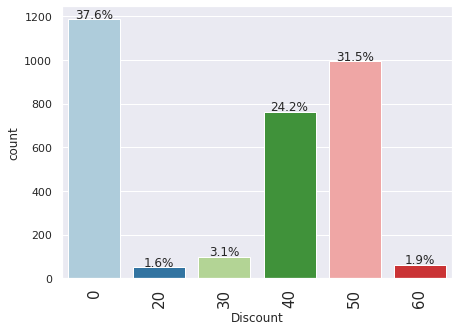

In [71]:
# let's explore discounts further
labeled_barplot(df, "Discount", perc=True)

**Observations**

- 37.6% of products did not have any discounts.
- More than 50% of the products have 40-50% discount.

### Bivariate Analysis

**Let's check for correlations.**

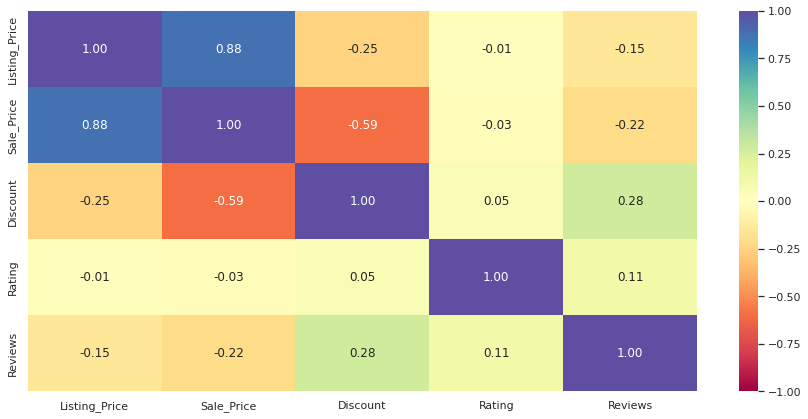

In [72]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

- The sale price and the listing price are highly positively correlated, which is obvious.
- Discount is somewhat negatively correlated with listing price or sale price, which indicates that expensive products either have fewer discounts or no discounts at all.

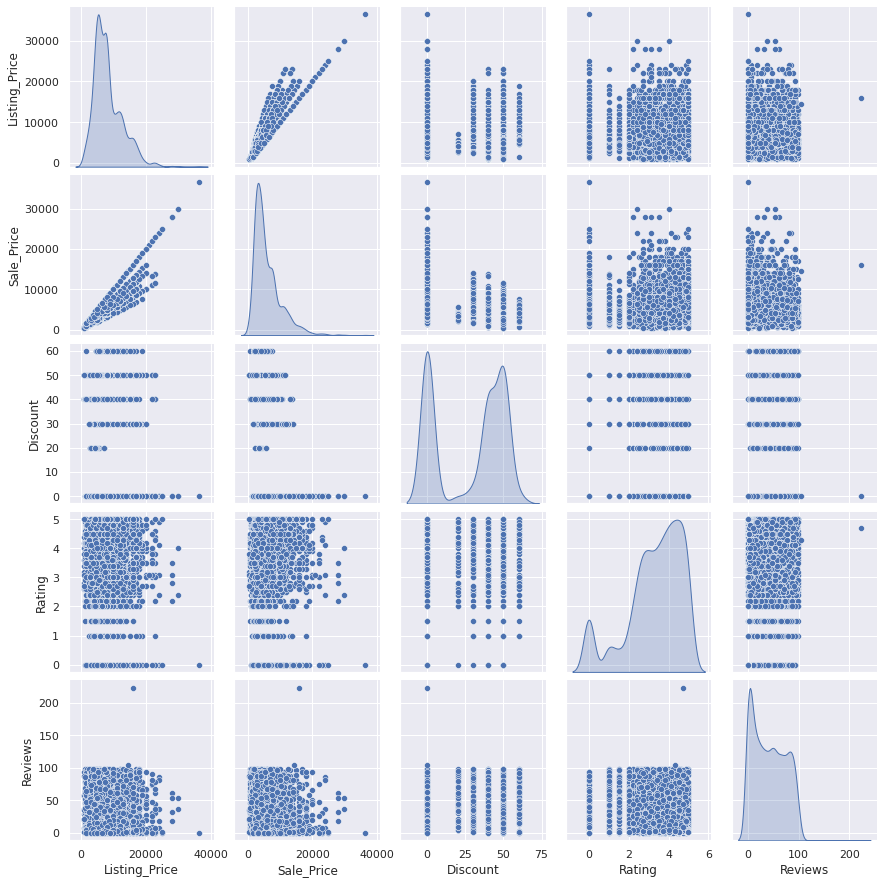

In [73]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Observations**

- 50-60% discounts are mostly given to products whose listing price is 10,000 or less.
- Many products have no discount.
- As seen before, most of the products have 100 or fewer reviews.

## Data Preprocessing

In [74]:
# variables used for clustering
num_col

['Listing_Price', 'Sale_Price', 'Discount', 'Rating', 'Reviews']

In [75]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [76]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## Dimensionality Reduction and Visualization using t-SNE

### Reduction to 2 dimensions

In [77]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, n_jobs=-2, random_state=1)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions

In [78]:
tsne_2d_data.head()

,Feature 1,Feature 2
0,5.484165,48.106518
1,-20.243189,-25.228975
2,-17.188854,-20.123543
3,-22.536451,-28.147573
4,-29.156799,25.825041


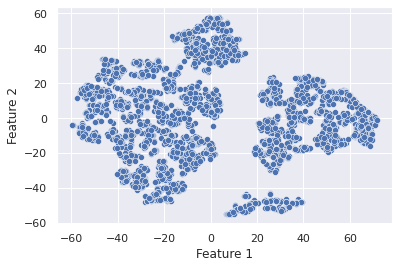

In [79]:
sns.scatterplot(data=tsne_2d_data, x="Feature 1", y="Feature 2");

- We can roughly see there are 4 clusters in the data.

In [81]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-2, random_state=1)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions
tsne_2d_data.head()

,Feature 1,Feature 2
0,2.842637,36.803574
1,-16.385950,-6.906006
2,-20.854708,-12.157463
3,-13.102514,-24.182362
4,-19.810390,13.738290


### Reduction to 3 dimensions

- We'll go ahead with perplexity=50

In [82]:
# Initiating the TSNE object and setting output dimension to 3
# n_components=3 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one core for parallel computation, which speeds up the process
tsne = TSNE(n_components=3, perplexity=50, n_jobs=-2, random_state=1)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_3d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2","Feature 3"])) # This DataFrame will have three columns corresponding to the three reduced dimensions

In [83]:
tsne_3d_data.head()

,Feature 1,Feature 2,Feature 3
0,2.463248,3.421439,5.330008
1,-1.978352,-0.444739,0.499146
2,-11.140088,-4.528828,-2.421174
3,-1.583373,1.893113,-0.320357
4,-4.560038,4.381106,4.311230


In [84]:
# plotting a 3D scatterplot
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3')
fig.show()

- The data seems to exhibit a good visual separation for perplexity=50 in three dimensions too, and we can roughly see there are 3 or 4 clusters.

- One can try out a similar exercise of checking different values of perplexity for the 3-dimensional data found from t-SNE.

## Model Building

- We'll build a K-means Clustering model now.

In [85]:
k_means_df = subset_scaled_df.copy()

In [86]:
clusters = range(2, 11)
WCSS = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)

    wcss = model.inertia_


    WCSS.append(wcss)

    print("Number of Clusters:", k, "\twcss:", wcss)

Number of Clusters: 2 	wcss: 10732.490188851167
Number of Clusters: 3 	wcss: 8864.045957172842
Number of Clusters: 4 	wcss: 7608.611265293423
Number of Clusters: 5 	wcss: 6449.955009848044
Number of Clusters: 6 	wcss: 5725.16484857183
Number of Clusters: 7 	wcss: 5163.491901234164
Number of Clusters: 8 	wcss: 4593.882653434538
Number of Clusters: 9 	wcss: 4235.164817672379
Number of Clusters: 10 	wcss: 3990.9674305573153


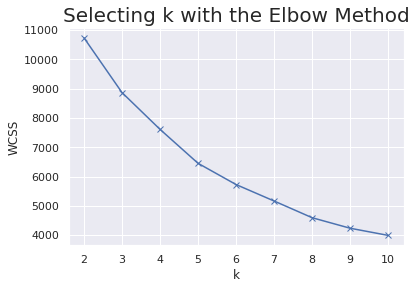

In [87]:
plt.plot(clusters,WCSS,"bx-")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

- Appropriate value for k seems to be 3 or 4.

Let's check the silhouette scores.

In [88]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.33477783024100377)
For n_clusters = 3, the silhouette score is 0.29744330547715736)
For n_clusters = 4, the silhouette score is 0.3064893745275659)
For n_clusters = 5, the silhouette score is 0.2703913853941806)
For n_clusters = 6, the silhouette score is 0.28128225793629197)
For n_clusters = 7, the silhouette score is 0.2830042744335799)
For n_clusters = 8, the silhouette score is 0.29266028387086274)
For n_clusters = 9, the silhouette score is 0.28600405822844854)


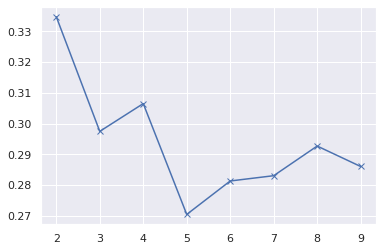

In [89]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

**Observations**

- The silhouette coefficient for 4 clusters is the highest.

In [90]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. KMeans KMeans(n_clusters=4, random_state=0)

In [91]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the dataframes
k_means_df["K_means_segments"] = kmeans.labels_    # scaled
df1["K_means_segments"] = kmeans.labels_    # original
tsne_2d_data["K_means_segments"] = kmeans.labels_    # t-SNE 2D
tsne_3d_data["K_means_segments"] = kmeans.labels_    # t-SNE 3D

## Cluster Profiling

### Visualizing Final Clusters

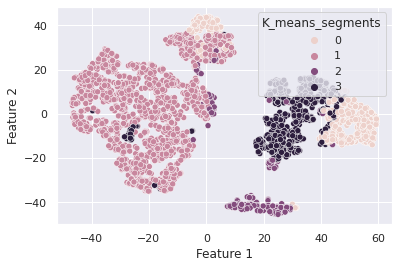

In [92]:
# visualizing the final cluster using t-SNE 2D
sns.scatterplot(data=tsne_2d_data, x='Feature 1', y='Feature 2', hue='K_means_segments');

In [93]:
# visualizing the final cluster using t-SNE 3D
# plotting a 3D scatterplot
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3',color='K_means_segments')
fig.show()

### Cluster Characteristics

In [94]:
cluster_profile = df1.select_dtypes(include=['number']).groupby("K_means_segments").mean()

In [95]:
cluster_profile["count_in_each_segments"] = (
    df1.select_dtypes(include=['number']).groupby("K_means_segments")["Sale_Price"].count().values
)

In [96]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Listing_Price,Sale_Price,Discount,Rating,Reviews,count_in_each_segments
K_means_segments,,,,,,
0,15557.331111,13424.604444,8.711111,3.928444,31.780000,450
1,6804.826331,3688.977031,45.462185,3.390924,50.151261,1785
2,9725.996255,8331.101124,7.715356,0.255805,11.898876,267
3,6505.070878,6167.425270,1.016949,3.797072,38.522342,649


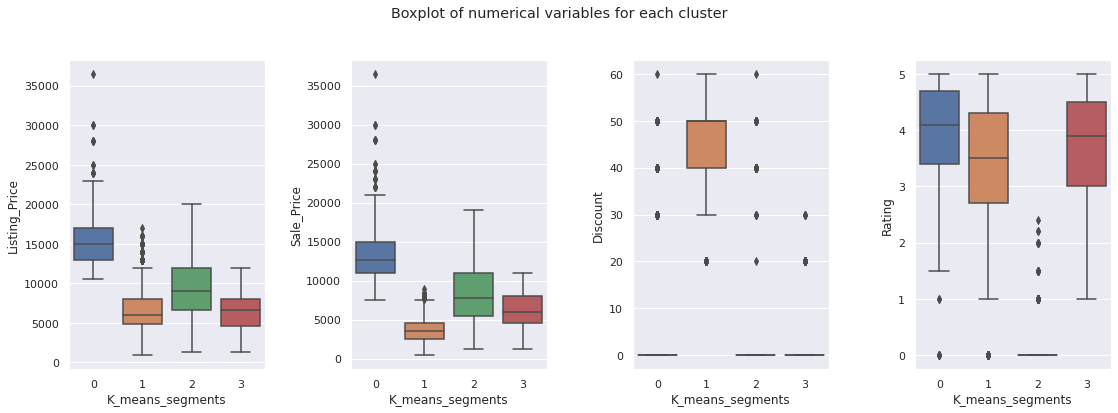

In [97]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for i in range(4):
    sns.boxplot(ax=axes[i], y=df1[num_col[counter]], x=df1["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

**Let's compare Cluster vs Brand**

In [98]:
pd.crosstab(df1.K_means_segments, df.Brand).style.highlight_max(
    color="lightgreen", axis=0
)

Brand,Adidas Adidas ORIGINALS,Adidas CORE / NEO,Adidas ORIGINALS,Adidas SPORT PERFORMANCE,Nike
K_means_segments,,,,,
0,0,0,133,128,189
1,1,864,564,356,0
2,0,18,53,23,173
3,0,229,156,99,165


**Observations**

- Adidas gives more discounts on their products, while Nike barely gives any.
- Nearly one-third of Nike products are premium in nature.

- **Cluster 0**:
    - This cluster contains more expensive premium products, with an average listing price of approximately 15500.
    - Almost no discount is given to products in this cluster.
    - The median rating of this cluster is around 4 suggesting that customers are very satisfied with 50% of the products in this cluster.
    - Products in these clusters have got lesser reviews, which can be because these products are very expensive and fewer people buy them.
   
- **Cluster 1**:
    - Listing price is low for products in this cluster, and the sale price is lower, as there are heavier discounts on these products.
    - 50% of the products have discounts between 30% to 40%.
    - More than 50% of products have a rating from 2.5 to 4.5 which indicates that customer satisfaction varies across products in this cluster.
    - On average, 50 reviews are given to products in this cluster.
    
- **Cluster 2**:
    - The listing price of products in this cluster is similar to those in Cluster 1, but the sale price is comparatively higher as there are almost no discounts.
    - On average, 38 reviews are given to products in this cluster.


- **Cluster 3**:
    - Listing and sale price of products in this cluster suggest that these are medium-range products.
    - Almost no discount is given to products in this cluster.
    - Products in this cluster have a low rating or no rating at all.

## Business Insights and Recommendations

**Recommendations**

- Cluster 0 consists of premium products, so focused marketing campaigns can be done to target customers with higher purchasing power.
- Cluster 0 products can also be made available in showrooms situated in premium locations because people generally tend to buy premium products from showrooms.
- Cluster 1 consists of products that are sold at higher discounts, so these might be the ones that are introduced in large quantity during festive sales (like Christmas, Black Friday, New Year, etc). This strategy can be continued with high inventory.
- Cluster 2 and 3 consists of products with comparatively low and medium prices with almost no discount, so general marketing campaigns can be done for these to target the general public.